In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from gensim.models import Word2Vec
# Cleaning the texts
import re
import regex
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from time import time

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yagne\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Importing the dataset
# dataset = pd.read_csv('preprocess_final.csv')
dataset = pd.read_csv("data/final_processed_data.csv")

In [3]:
dataset["cleaned_text"] = dataset["cleaned_text"].apply(lambda x:  x.encode("latin", "ignore").decode("utf-8", "ignore"))

In [5]:
dataset.head()

,author,selftext,created_utc,subreddit,subreddit_subscribers,title,date,year-month,post_length,depression,full_text,cleaned_text
0,--PunPun--,I'm a relatively new Evelynn player and right ...,1587305577,EvelynnMains,14681,Has anyone made a detailed spreadsheet of her ...,2020-04-19 10:12:57,2020-04,51,1.0,Has anyone made a detailed spreadsheet of her ...,has_anyone make detailed spreadsheet matchup l...
1,--jyushimatsudesu,"""my arm hurt this morning and i prayed and now...",1552057727,exchristian,48153,so self centered,2019-03-08 10:08:47,2019-03,88,1.0,"so self centered ""my arm hurt this morning and...",self center my_arm hurt this_morning pray it_d...
2,--jyushimatsudesu,"(warning : very sappy, i'm sorry, she's just g...",1552258247,teenagers,1226850,letter to my crush ♥,2019-03-10 18:50:47,2019-03,186,1.0,"letter to my crush ♥ (warning : very sappy, i'...",letter my_crush warning sappy am_sorry she_is ...
3,--jyushimatsudesu,"being watched, 24/7?? like, imagine if someone...",1553425235,exchristian,48201,do Christians actually think about this?,2019-03-24 07:00:35,2019-03,117,1.0,do Christians actually think about this? being...,christian actually think_about watch 247 like ...
4,--jyushimatsudesu,i don't mean what happens when you feel you're...,1554040237,TooAfraidToAsk,578671,who else suddenly jolts awake from a light sle...,2019-03-31 09:50:37,2019-03,51,1.0,who else suddenly jolts awake from a light sle...,who_else suddenly jolt awake light sleep no_re...


In [6]:
dataset = dataset.loc[dataset["cleaned_text"] != ""]

In [7]:
from collections import Counter
Counter(dataset["depression"].tolist())


Counter({1.0: 48009, 0.0: 56052})

In [8]:
dataset["depression"] = dataset["depression"].astype(int)

In [9]:
dataset = dataset.dropna()

In [10]:
# dataset = dataset.sample(frac=0.1) #Change here

In [11]:
corpus = dataset["cleaned_text"].tolist()

In [12]:
dataset.head()

,author,selftext,created_utc,subreddit,subreddit_subscribers,title,date,year-month,post_length,depression,full_text,cleaned_text
0,--PunPun--,I'm a relatively new Evelynn player and right ...,1587305577,EvelynnMains,14681,Has anyone made a detailed spreadsheet of her ...,2020-04-19 10:12:57,2020-04,51,1,Has anyone made a detailed spreadsheet of her ...,has_anyone make detailed spreadsheet matchup l...
1,--jyushimatsudesu,"""my arm hurt this morning and i prayed and now...",1552057727,exchristian,48153,so self centered,2019-03-08 10:08:47,2019-03,88,1,"so self centered ""my arm hurt this morning and...",self center my_arm hurt this_morning pray it_d...
2,--jyushimatsudesu,"(warning : very sappy, i'm sorry, she's just g...",1552258247,teenagers,1226850,letter to my crush ♥,2019-03-10 18:50:47,2019-03,186,1,"letter to my crush ♥ (warning : very sappy, i'...",letter my_crush warning sappy am_sorry she_is ...
3,--jyushimatsudesu,"being watched, 24/7?? like, imagine if someone...",1553425235,exchristian,48201,do Christians actually think about this?,2019-03-24 07:00:35,2019-03,117,1,do Christians actually think about this? being...,christian actually think_about watch 247 like ...
4,--jyushimatsudesu,i don't mean what happens when you feel you're...,1554040237,TooAfraidToAsk,578671,who else suddenly jolts awake from a light sle...,2019-03-31 09:50:37,2019-03,51,1,who else suddenly jolts awake from a light sle...,who_else suddenly jolt awake light sleep no_re...


In [13]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yagne\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
from nltk.tokenize import word_tokenize
data_corpus = [word_tokenize(x) for x in corpus]

In [15]:
model = Word2Vec(data_corpus, min_count = 3, vector_size = 300, window = 5)
# glove_vectors = gensim.downloader.load('glove-twitter-25')

In [16]:
y = dataset["depression"].tolist()

In [29]:
X = []
for sen in corpus:
    temp = []
    for tok in sen :
        if tok in model.wv:
            temp.append(model.wv[tok])
        
    X.append(temp)

In [34]:
X[1][0].shape

(300,)

In [35]:
for i,x in enumerate(X):
    if x == []:
        X[i] = [np.zeros(shape=(300,))]

In [ ]:
X_new[74576] = np.zeros(shape=(300,))

In [36]:
X_new = [np.average(i, axis=0) for i in X]

In [38]:
X_new = np.array(X_new)
X_new.shape

(104061, 300)

In [39]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=0)

In [40]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [41]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, classification_report

cm2 = confusion_matrix(y_test, y_pred)
print(cm2)

a = accuracy_score(y_test, y_pred)
p = precision_score(y_test, y_pred)
r = recall_score(y_test, y_pred)
f = f1_score(y_test, y_pred)
print(a, p, r, f)
print(classification_report(y_test, y_pred))

[[4467 6752]
 [3200 6394]]
0.5218373132177004 0.4863836908565343 0.6664582030435688 0.5623570800351803
              precision    recall  f1-score   support

           0       0.58      0.40      0.47     11219
           1       0.49      0.67      0.56      9594

    accuracy                           0.52     20813
   macro avg       0.53      0.53      0.52     20813
weighted avg       0.54      0.52      0.51     20813



In [ ]:
#########RandomForestClassifier
# Fitting classifier to the Training set
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=100, criterion="entropy", random_state=0, n_jobs=-1)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
cm2 = confusion_matrix(y_test, y_pred)
print(cm2)

a = accuracy_score(y_test, y_pred)
p = precision_score(y_test, y_pred)
r = recall_score(y_test, y_pred)
f = f1_score(y_test, y_pred)
print(a, p, r, f)

print(classification_report(y_test, y_pred))

[[7639 3580]
 [5805 3789]]
0.5490799019843368 0.5141810286334645 0.3949343339587242 0.446737015858044
              precision    recall  f1-score   support

           0       0.57      0.68      0.62     11219
           1       0.51      0.39      0.45      9594

    accuracy                           0.55     20813
   macro avg       0.54      0.54      0.53     20813
weighted avg       0.54      0.55      0.54     20813



In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)

lr.fit(X_train, y_train)
# Predicting the Test set results
y_pred = lr.predict(X_test)
cm2 = confusion_matrix(y_test, y_pred)
print(cm2)

a = accuracy_score(y_test, y_pred)
p = precision_score(y_test, y_pred)
r = recall_score(y_test, y_pred)
f = f1_score(y_test, y_pred)
print(a, p, r, f)
print(classification_report(y_test, y_pred))

[[8523 2696]
 [6458 3136]]
0.5601787344448181 0.5377229080932785 0.3268709610173025 0.4065862828990017
              precision    recall  f1-score   support

           0       0.57      0.76      0.65     11219
           1       0.54      0.33      0.41      9594

    accuracy                           0.56     20813
   macro avg       0.55      0.54      0.53     20813
weighted avg       0.55      0.56      0.54     20813



c:\Users\yagne\anaconda3\envs\common\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
import tensorflow as tf
tf.__version__

'2.8.0'

In [42]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers

In [43]:
MAX_NB_WORDS = 200000
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(corpus)

In [44]:
sequences = tokenizer.texts_to_sequences(corpus)

In [45]:
word_index = tokenizer.word_index 
nb_words = min(MAX_NB_WORDS, len(word_index) + 1)
EMBEDDING_DIM = 300

In [46]:
embedding_matrix = np.zeros((nb_words, EMBEDDING_DIM))
for word, i in word_index.items():
    if i >= MAX_NB_WORDS:
        continue
    if word in model.wv:
        embedding_matrix[i] = model.wv[word]



In [47]:
MAX_SEQUENCE_LENGTH = 60
data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
labels = np.array(y)

In [68]:
# cutting data set to 30k elenment 
num_train = int(len(data)*0.8)
num_val = int(len(data)*0.1)
perm = np.random.permutation(len(data))
idx_train = perm[:num_train]
idx_val = perm[num_train: num_train + num_val]
idx_test = perm[num_train + num_val:]
data_train = data[idx_train]
data_val = data[idx_val]
data_test = data[idx_test]
label_train = labels[idx_train]
label_val = labels[idx_val]
label_test = labels[idx_test]

In [69]:
idx_train.shape, idx_test.shape, idx_val.shape

((83248,), (10407,), (10406,))

In [70]:
from tensorflow.keras.layers import BatchNormalization

# Define the Keras model
model = Sequential()
model.add(Embedding(nb_words, EMBEDDING_DIM, weights=[embedding_matrix], input_length=MAX_SEQUENCE_LENGTH, trainable=False))
model.add(LSTM(128))
model.add(Dropout(0.15))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

In [71]:
early_stopping =EarlyStopping(monitor='loss', patience=8)
STAMP = 'lstm_model'
bst_model_path = STAMP + '.h5'
model_checkpoint = ModelCheckpoint(bst_model_path, save_best_only=True, save_weights_only=True)

In [72]:
# Compile the model
optimizer = optimizers.Adam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Give a summary
model.summary()

# Train the model
history = model.fit(data_train, label_train, validation_data=(data_val, label_val), 
          epochs=10, batch_size=1024, shuffle=True, callbacks=[early_stopping, model_checkpoint])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 60, 300)           42790500  
                                                                 
 lstm_1 (LSTM)               (None, 128)               219648    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 43,010,789
Trainable params: 220,033
Non-trainable params: 42,790,756
____________________________________

c:\Users\yagne\anaconda3\envs\common\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


82/82 [==============================] - 32s 383ms/step - loss: 0.7018 - accuracy: 0.5591 - val_loss: 0.6602 - val_accuracy: 0.5843
Epoch 2/10
82/82 [==============================] - 31s 382ms/step - loss: 0.6518 - accuracy: 0.5917 - val_loss: 0.6517 - val_accuracy: 0.5987
Epoch 3/10
82/82 [==============================] - 30s 365ms/step - loss: 0.6389 - accuracy: 0.6075 - val_loss: 0.6519 - val_accuracy: 0.5884
Epoch 4/10
82/82 [==============================] - 29s 359ms/step - loss: 0.6312 - accuracy: 0.6201 - val_loss: 0.6506 - val_accuracy: 0.5925
Epoch 5/10
82/82 [==============================] - 29s 356ms/step - loss: 0.6231 - accuracy: 0.6315 - val_loss: 0.6514 - val_accuracy: 0.5950
Epoch 6/10
82/82 [==============================] - 30s 362ms/step - loss: 0.6124 - accuracy: 0.6442 - val_loss: 0.6606 - val_accuracy: 0.5876
Epoch 7/10
82/82 [==============================] - 29s 356ms/step - loss: 0.5996 - accuracy: 0.6592 - val_loss: 0.6658 - val_accuracy: 0.5837
Epoch 8/10

In [73]:
loss, accuracy = model.evaluate(data_test, label_test, verbose=1)
print('Accuracy: %f' % (accuracy*100))

326/326 [==============================] - 3s 11ms/step - loss: 0.7256 - accuracy: 0.5749
Accuracy: 57.490152


In [74]:
print('Accuracy: %f' % (accuracy*100))

Accuracy: 57.490152


In [75]:
y_preds = model.predict(data_test, verbose=1)

326/326 [==============================] - 4s 10ms/step


In [76]:
test_corpus_data = np.array(corpus)[idx_test]

In [77]:
test_corpus_data.shape

(10407,)

In [61]:
idx_test

array([102518,  65801,  87813, ...,  94520,  48039,  59036])

In [59]:
y_preds.shape

NameError: name 'y_preds' is not defined

In [78]:
y_preds[:,0] > 0.5

array([False,  True,  True, ...,  True, False, False])

In [79]:
print(classification_report(label_test,y_preds[:,0] > 0.5))

              precision    recall  f1-score   support

           0       0.64      0.49      0.55      5585
           1       0.53      0.68      0.60      4822

    accuracy                           0.57     10407
   macro avg       0.58      0.58      0.57     10407
weighted avg       0.59      0.57      0.57     10407



In [ ]:
np.save("lstm_y_pred.npy", (y_preds[:,0] > 0.5))
np.save("lstm_y_true.npy", data_test)

dict_keys(['loss', 'accuracy'])


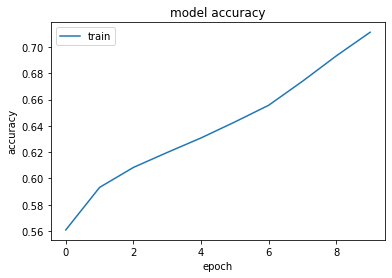

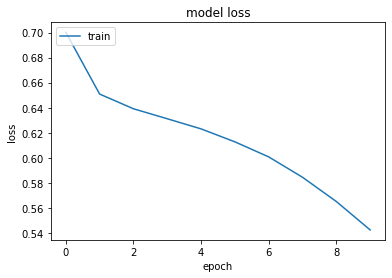

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'dev'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'dev'], loc='upper left')
plt.show()